In [7]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available
# from sklearn import cross_validation
%matplotlib inline


os.getcwd()
os.chdir("D:/Edwisor assignments/Edwisor Project/")
os.getcwd()

#get the list of files in the  directy

print(os.listdir(os.getcwd()))

#help('read_csv')

df_day=pd.read_csv("day.csv")

#Print the `head` of the data
df_day.head()



['day.csv', 'rentalregressor.txt', 'sample-report.pdf', 'scatterplot.png', 'tree.dot']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#understanding of data
df_day.shape
#It contains (731, 16)

df_day.describe()

#df_day.info()

#data  consist of Integers , Float  and Object(categorical) variables 

In [ ]:

##################################################### Univariate Analysis##########################################
# Target variable  analysis

#descriptive statistics summary
df_day['cnt'].describe()

#Check whether target variable is normal or not
sns.distplot(df_day['cnt']);




In [ ]:
#Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(df_day['temp']);

#Check whether  variable 'atemp'is normal or not
sns.distplot(df_day['atemp']);

#Check whether  variable 'hum'is normal or not
sns.distplot(df_day['hum']);

#Check whether  variable 'windspeed'is normal or not
sns.distplot(df_day['windspeed']);


#Check whether  variable 'casual'is normal or not
sns.distplot(df_day['casual']);



#Check whether  variable 'registered'is normal or not
sns.distplot(df_day['registered']);


# it is clearly showing that chances of outliers present in  'casual' varible

In [ ]:
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

#Here Skewness is very less so target variable  is normal distribution

In [ ]:
######################################### Bivariate  Relationship #####################################################
  

#relation between Numerical Variable 'temp' and target variable 'cnt'

df_day['temp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'temp' and 'cnt'


In [ ]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'

df_day['atemp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'atemp' and 'cnt'


In [ ]:
#relation between Numerical Variable 'hum' and target variable 'cnt'

df_day['hum'].value_counts()

#Now draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is average relation between 'atemp' and 'cnt'



In [ ]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'

df_day['windspeed'].value_counts()

#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is nagative relation between 'windspeed' and 'cnt'




In [ ]:

#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that for all the weekdays median in between 4000- 5000  

In [ ]:

#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that median  high on  holidays when compare to weekdays

In [ ]:
##########################################   missing  values ##############################################
#total_missing_values = df_day.isnull().sum().sort_values(ascending=False)
#total_missing_value

total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
#Already all numeric variable  are in normalize form so  , we are not analysing  Outliers   here

#here the  six  numerics variables are present  out of six four variables are in normalize form , 
#  temp,atem,hum,windspread  are in  normalize form  no need to check outliers

#casual and registered  have to check outliers

df_day_1 =  df_day.copy()


0.6728044333386831

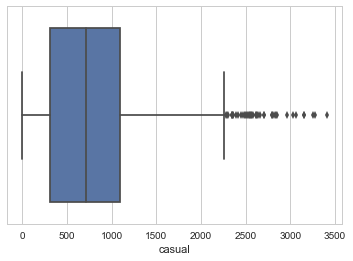

In [20]:
######################################### Outlier Analysis ##########

df_day.head()

#plt.boxplot(df_day_1['casual'])

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day['casual'],orient ='h')

#It seems Outliers are present  in  'Casual' variable  but we are keeping as it is , will detect and  conver outliers  during tuning 
#process

# Correlation before  outlier treatment

# Correlation between 'casual' and 'cnt'  before  removal of  outliers
#sns.regplot(x="casual", y="cnt", data=df_day);

df_day['casual'].corr(df_day['cnt'])



-855.25
2266.75


0.6460020508747333

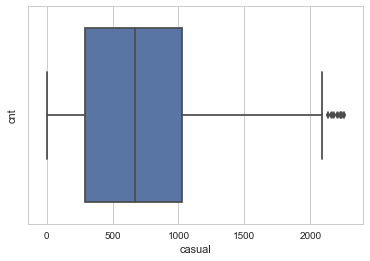

In [21]:
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df_day.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

df_day_out = df_day.copy()

df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,i] < min].index)
df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,'casual'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day_out['casual'],orient ='h')

# Correlation between 'casual' and 'cnt'  after  removal of  outliers
sns.regplot(x="casual", y="cnt", data=df_day_out);

df_day_out['casual'].corr(df_day_out['cnt'])


In [ ]:
############################################# feature  selection   #######################################
df_day.head()
#Selection of numerical feature  based  on pearson corelation 

day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]
#day_numeric.shape


#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)



In [ ]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(day_numeric[cols], size = 2.5,kind="reg")
plt.show();

#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'temp' and 'atemp'
# There is a   poor relation between  Independent variable 'hum' and dependent  variable 'cnt'

# so dropping two variables for feature selection

numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

numeric_features.head()

numeric_features.shape


In [ ]:
# feature  Scaling
#######################################  Normality  Check ######################################

cnames = ['casual','registered']

for i in cnames :
    print(i)
    df_day[i] = (df_day[i] - min(df_day[i]))/(max(df_day[i]) - min(df_day[i]))

df_day.head()

In [ ]:
#now iam not checking  categorical feature importance i will check it later during tuning process

#Now  for variable  not doing  Data Scaling  this will do during tuning process
    

In [ ]:
#diividing  Test and train data  using skilearn   train_test_split 

df_day_feature_selection = df_day.drop(['atemp','hum'],axis = 1)
df_day_feature_selection.shape

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_day_feature_selection, test_size=0.2)

#train.shape

train.head()
#test.shape
#train.iloc[:,2:13]
#test.head()
#train.iloc[:,13]

In [ ]:
#********************************** Decision Tree  Regressor ************************************
#Importing Decision Tree Regressor from sklear.tree
from sklearn.tree import DecisionTreeRegressor

train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values
train_features_one
#target_feature

# Implement  decision tree algorithm

# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)



#Decision tree for regression
#fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,2:13], train.iloc[:,13])

#Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

# predition   by using predict method

#predictions_DT = my_tree_one.predict(test_feature)




In [ ]:


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

# Error  is getting  "3.597167961514944"

In [ ]:

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 8
min_samples_split =4
my_tree_two = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

predictions_DT_two = my_tree_two.predict(test_feature)

print(predictions_DT_two)

MAPE(test_target_feature,predictions_DT_two)

#Now error is getting  '3.689409886025817'

In [ ]:
#RSS - Residual Sum 
#test_target_feature,predictions_DT_two
rss= ((test_target_feature-predictions_DT_two)**2).sum()
print(rss)

MSE = np.mean((test_target_feature-predictions_DT_two)**2)
print(MSE)

#RMSE
rmse=np.sqrt(MSE)
print(rmse)

    


In [ ]:

def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

#MAPE 
MAPE(test_target_feature,predictions_DT_two)

#MAPE : 3.87
#RMSE

RMSE(test_target_feature,predictions_DT_two)

#170.1746206057741


In [ ]:
#************************************ Random Forest ************************************************
#here  same features are taking  what we took for the Decision Tree
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#train_features_one

# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)
#rf_exp.fit(train_features, train_labels)

#print(RF_model)
# Predict the model using predict funtion

RF_predict_one= RF_model_one.predict(test_feature)

#print(RF_predict)



In [ ]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

#Error rate is 1.75

#Here it is stating accuracy of the model increases

In [ ]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_one)

#RMSE =  79.51

In [ ]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn


mir_result = fs.mutual_info_regression(train_features_one, train_target_feature) # mutual information regression feature ordering
mir_result
#feature_scores = []
#for i in np.arange(len(train)):
#    feature_scores.append([train_variables_one_1[i],mir_result[i]])
#sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
#print(np.array(sorted_scores))

In [ ]:
#tuning  Random FOrest Model

importances = list(RF_model_one.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(pair)) for pair in feature_importances]


In [ ]:

train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

In [ ]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [ ]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now we 
#wil check our model accuracy  by reducing features
train_feature_two = train[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
# build random forest model

Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)
#rf_exp.fit(train_features, train_labels)

#print(RF_model)
# Predict the model using predict funtion

RF_predict_two= Rf_model_two.predict(test_feature_two)

print(RF_predict_two)


In [ ]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

#Error rate is 1.7174437877815665

#Here it is stating accuracy of the model increases slightly

In [ ]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_two)

#RMSE =  126.06197301780921


# Accuracy and  RMSE is improved  

In [ ]:
############################################# Linear Regression ############################
#here  same features are taking  what we took for the Linear Regression
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#test_target_feature

#import  linear regreesion  

import statsmodels.api as sm

#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature, train_features_one).fit()

#Summary of model
linear_regression_model.summary()

#predict the  model

#predict_LR = linear_regression_model.predict(test_feature)

#print(predict_LR)


In [ ]:
#evaluate model using MAPE

MAPE(test_target_feature,predict_LR)
#MAPE  is  0.108

#Predict the model using  RMSE

RMSE(test_target_feature,predict7_LR)

#RMSE  is  '3.9'

#it is  showing that  Linear Regression model is  best suitable for the dataset

In [ ]:
# COnclusion  Linear regression is the  best model for the dataset